In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import contingency_matrix
import os
import decimal
from math import log
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import itertools
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('GoogleStocks.csv')
data=data[1:]
data

date    close   volume      open       high        low
1    2019-03-26  1184.62  1894639  1198.530  1202.8300  1176.7200
2    2019-03-25  1193.00  1493841  1196.930  1206.3975  1187.0400
3    2019-03-22  1205.50  1668910  1226.320  1230.0000  1202.8250
4    2019-03-21  1231.54  1195899  1216.000  1231.7900  1213.1500
5    2019-03-20  1223.97  2089367  1197.350  1227.1400  1196.1700
6    2019-03-19  1198.85  1404863  1188.810  1200.0000  1185.8700
7    2019-03-18  1184.26  1212506  1183.300  1190.0000  1177.4211
8    2019-03-15  1184.46  2457597  1193.380  1196.5700  1182.6100
9    2019-03-14  1185.55  1150950  1194.510  1197.8800  1184.4800
10   2019-03-13  1193.32  1434816  1200.645  1200.9300  1191.9400
11   2019-03-12  1193.20  2012306  1178.260  1200.0000  1178.2600
12   2019-03-11  1175.76  1569332  1144.450  1176.1900  1144.4500
13   2019-03-08  1142.32  1212271  1126.730  1147.0800  1123.3000
14   2019-03-07  1143.30  1166076  1155.720  1156.7550  1134.9100
15   2019-03-06  1157.86  1094100  1162.490  1167.5658  1155.4900
16   2019-03-05  1162.03  1422357  1150.060  1169.6100  1146.1950
17   2019-03-04  1147.80  1444774  1146.990  1158.2804  1130.6900
18   2019-03-01  1140.99  1447454  1124.900  1142.9700  1124.7500
19   2019-02-28  1119.92  1541068  1111.300  1127.6500  1111.0100
20   2019-02-27  1116.05   968362  1106.950  1117.9800  1101.0000
21   2019-02-26  1115.13  1469761  1105.750  1119.5100  1099.9200
22   2019-02-25  1109.40  1395281  1116.000  1118.5400  1107.2700
23   2019-02-22  1110.37  1048361  1100.900  1111.2400  1095.6000
24   2019-02-21  1096.97  1414744  1110.840  1111.9400  1092.5200
25   2019-02-20  1113.80  1080144  1119.990  1123.4100  1105.2800
26   2019-02-19  1118.56  1046315  1110.000  1121.8900  1110.0000
27   2019-02-15  1113.65  1442461  1130.080  1131.6700  1110.6500
28   2019-02-14  1121.67   941678  1118.050  1128.2300  1110.4450
29   2019-02-13  1120.16  1048630  1124.990  1134.7300  1118.5000
30   2019-02-12  1121.37  1608658  1106.800  1125.2950  1105.8500
..          ...      ...      ...       ...        ...        ...
726  2016-05-06   711.12  1828508   698.380   711.8600   698.1067
727  2016-05-05   701.43  1680220   697.700   702.3199   695.7200
728  2016-05-04   695.70  1692757   690.490   699.7500   689.0100
729  2016-05-03   692.36  1541297   696.870   697.8400   692.0000
730  2016-05-02   698.21  1645013   697.630   700.6400   691.0000
731  2016-04-29   693.01  2486584   690.700   697.6200   689.0000
732  2016-04-28   691.02  2859790   708.260   714.1700   689.5500
733  2016-04-27   705.84  3094905   707.290   708.9800   692.3651
734  2016-04-26   708.14  2739133   725.420   725.7660   703.0264
735  2016-04-25   723.15  1956956   716.100   723.9300   715.5900
736  2016-04-22   718.77  5949699   726.300   736.1200   713.6100
737  2016-04-21   759.14  2995094   755.380   760.4500   749.5500
738  2016-04-20   752.67  1526776   758.000   758.1315   750.0100
739  2016-04-19   753.93  2027962   769.510   769.9000   749.3300
740  2016-04-18   766.61  1557199   760.460   768.0500   757.3000
741  2016-04-15   759.00  1807062   753.980   761.0000   752.6938
742  2016-04-14   753.20  1134056   754.010   757.3100   752.7050
743  2016-04-13   751.72  1707397   749.160   754.3800   744.2610
744  2016-04-12   743.09  1349780   738.000   743.8300   731.0100
745  2016-04-11   736.10  1218789   743.020   745.0000   736.0500
746  2016-04-08   739.15  1289869   743.970   745.4500   735.5500
747  2016-04-07   740.28  1452369   745.370   746.9999   736.2800
748  2016-04-06   745.69  1052171   735.770   746.2400   735.5600
749  2016-04-05   737.80  1130817   738.000   742.8000   735.3700
750  2016-04-04   745.29  1134214   750.060   752.8000   742.4300
751  2016-04-01   749.91  1576240   738.600   750.3400   737.0000
752  2016-03-31   744.95  1718638   749.250   750.8500   740.9400
753  2016-03-30   750.53  1782278   750.100   757.8800   748.7400
754  2016-03-29   744.77  1902254   734.590   747.2

In [4]:
train_data, test_data= train_test_split(data, test_size=0.2, shuffle=False)
test_data

date   close   volume    open      high       low
605  2016-10-27  795.35  2723097  801.00  803.4900  791.5000
606  2016-10-26  799.07  1645403  806.34  806.9800  796.3200
607  2016-10-25  807.67  1575020  816.68  816.6800  805.1400
608  2016-10-24  813.11  1693162  804.90  815.1800  804.8200
609  2016-10-21  799.37  1262042  795.00  799.5000  794.0000
610  2016-10-20  796.97  1755546  803.30  803.9700  796.0300
611  2016-10-19  801.56  1762990  798.86  804.6300  797.6350
612  2016-10-18  795.26  2046338  787.85  801.6100  785.5650
613  2016-10-17  779.96  1091524  779.80  785.8500  777.5000
614  2016-10-14  778.53   851512  781.65  783.9500  776.0000
615  2016-10-13  778.19  1360619  781.22  781.2200  773.0000
616  2016-10-12  786.14   935138  783.76  788.1300  782.0600
617  2016-10-11  783.07  1371461  786.66  792.2800  780.5800
618  2016-10-10  785.94  1161410  777.71  789.3800  775.8700
619  2016-10-07  775.08   932444  779.66  779.6600  770.7500
620  2016-10-06  776.86  1066910  779.00  780.4800  775.5400
621  2016-10-05  776.47  1457661  779.31  782.0700  775.6500
622  2016-10-04  776.43  1198361  776.03  778.7100  772.8900
623  2016-10-03  772.56  1276614  774.25  776.0650  769.5000
624  2016-09-30  777.29  1583293  776.33  780.9400  774.0900
625  2016-09-29  775.01  1310252  781.44  785.8000  774.2320
626  2016-09-28  781.56  1108249  777.85  781.8100  774.9700
627  2016-09-27  783.01  1152760  775.50  785.9899  774.3080
628  2016-09-26  774.21  1531788  782.74  782.7400  773.0700
629  2016-09-23  786.90  1411439  786.59  788.9300  784.1500
630  2016-09-22  787.21  1483899  780.00  789.8500  778.4400
631  2016-09-21  776.22  1166290  772.66  777.1600  768.3010
632  2016-09-20  771.41   975434  769.00  773.3300  768.5300
633  2016-09-19  765.70  1171969  772.42  774.0000  764.4406
634  2016-09-16  768.88  2047036  769.75  769.7500  764.6600
..          ...     ...      ...     ...       ...       ...
726  2016-05-06  711.12  1828508  698.38  711.8600  698.1067
727  2016-05-05  701.43  1680220  697.70  702.3199  695.7200
728  2016-05-04  695.70  1692757  690.49  699.7500  689.0100
729  2016-05-03  692.36  1541297  696.87  697.8400  692.0000
730  2016-05-02  698.21  1645013  697.63  700.6400  691.0000
731  2016-04-29  693.01  2486584  690.70  697.6200  689.0000
732  2016-04-28  691.02  2859790  708.26  714.1700  689.5500
733  2016-04-27  705.84  3094905  707.29  708.9800  692.3651
734  2016-04-26  708.14  2739133  725.42  725.7660  703.0264
735  2016-04-25  723.15  1956956  716.10  723.9300  715.5900
736  2016-04-22  718.77  5949699  726.30  736.1200  713.6100
737  2016-04-21  759.14  2995094  755.38  760.4500  749.5500
738  2016-04-20  752.67  1526776  758.00  758.1315  750.0100
739  2016-04-19  753.93  2027962  769.51  769.9000  749.3300
740  2016-04-18  766.61  1557199  760.46  768.0500  757.3000
741  2016-04-15  759.00  1807062  753.98  761.0000  752.6938
742  2016-04-14  753.20  1134056  754.01  757.3100  752.7050
743  2016-04-13  751.72  1707397  749.16  754.3800  744.2610
744  2016-04-12  743.09  1349780  738.00  743.8300  731.0100
745  2016-04-11  736.10  1218789  743.02  745.0000  736.0500
746  2016-04-08  739.15  1289869  743.97  745.4500  735.5500
747  2016-04-07  740.28  1452369  745.37  746.9999  736.2800
748  2016-04-06  745.69  1052171  735.77  746.2400  735.5600
749  2016-04-05  737.80  1130817  738.00  742.8000  735.3700
750  2016-04-04  745.29  1134214  750.06  752.8000  742.4300
751  2016-04-01  749.91  1576240  738.60  750.3400  737.0000
752  2016-03-31  744.95  1718638  749.25  750.8500  740.9400
753  2016-03-30  750.53  1782278  750.10  757.8800  748.7400
754  2016-03-29  744.77  1902254  734.59  747.2500  728.7600
755  2016-03-28  733.53  1300817  736.79  738.9900  732.5000

[151 rows x 6 columns]

In [ ]:
open_price = np.array(train_data['open'])
close_price = np.array(train_data['close'])
high_price = np.array(train_data['high'])
low_price = np.array(train_data['low'])

# Compute the fraction change in close, high and low prices
# which would be used a feature
open_price=open_price.astype(np.float)
close_price=close_price.astype(np.float)
high_price=high_price.astype(np.float)
low_price=low_price.astype(np.float)

frac_change = (close_price-open_price)/open_price
frac_high = (high_price - open_price)/open_price
frac_low = (open_price - low_price)/open_price

In [ ]:
data_new=np.column_stack((frac_change, frac_high, frac_low))
data_new

array([[-0.01160588,  0.00358773,  0.01819729],
       [-0.0032834 ,  0.00790982,  0.00826281],
       [-0.01697762,  0.00300085,  0.01915895],
       ...,
       [ 0.00091967,  0.0084303 ,  0.00938829],
       [-0.0137403 ,  0.00174739,  0.01441915],
       [-0.0160574 ,  0.00883281,  0.01825942]])

In [ ]:
n_latency_days=20
n_steps_frac_change=50
n_steps_frac_high=10
n_steps_frac_low=10

In [ ]:
def extract_features(data):
      
# Compute the fraction change in close, high and low prices
# which would be used a feature
        open_price = np.array(data['open'])
        close_price = np.array(data['close'])
        high_price = np.array(data['high'])
        low_price = np.array(data['low'])
        
        open_price=open_price.astype(np.float)
        close_price=close_price.astype(np.float)
        high_price=high_price.astype(np.float)
        low_price=low_price.astype(np.float)
 
        # Compute the fraction change in close, high and low prices
        # which would be used a feature
        frac_change = (close_price - open_price) / open_price
        frac_high = (high_price - open_price) / open_price
        frac_low = (open_price - low_price) / open_price
 
        return np.column_stack((frac_change, frac_high, frac_low))

In [ ]:
def compute_all_possible_outcomes():
        frac_change_range = np.linspace(-0.1, 0.1, n_steps_frac_change)
        frac_high_range = np.linspace(0, 0.1, n_steps_frac_high)
        frac_low_range = np.linspace(0, 0.1, n_steps_frac_low)
        return np.array(list(itertools.product(frac_change_range, frac_high_range, frac_low_range)))

In [ ]:
def get_most_probable_outcome(n_latency_days,hmm,possible_outcomes,day_index):
        previous_data_start_index = max(0, day_index - n_latency_days)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = test_data.iloc[previous_data_end_index: previous_data_start_index]
        previous_data_features =extract_features(previous_data)
        outcome_score = []
        for possible_outcome in possible_outcomes:
            total_data = np.row_stack((previous_data_features, possible_outcome))
            outcome_score.append(hmm.score(total_data))
        most_probable_outcome = possible_outcomes[np.argmax(outcome_score)]
        return most_probable_outcome
    
def predict_close_price(n_latency_days,hmm,possible_outcomes,day_index):
    open_price = test_data.iloc[day_index]['open']
#     open_price=open_price.astype(np.float)
    open_price = float(open_price)
    predicted_frac_change, _, _ = get_most_probable_outcome(n_latency_days,hmm,possible_outcomes,day_index)
    return open_price * (1 + predicted_frac_change)
 
def predict_close_prices_for_days(n_latency_days,hmm,possible_outcomes,days, with_plot=False):
    predicted_close_prices = []
    print(n_latency_days)
    for day_index in tqdm(range(days)):
        predicted_close_prices.append(predict_close_price(n_latency_days,hmm,possible_outcomes,day_index))

    if with_plot:
        test_data_x = test_data[0: days]
        days = np.array(test_data_x['date'], dtype="datetime64[ms]")
        actual_close_prices = test_data_x['close']
        fig = plt.figure()
        axes = fig.add_subplot(111)
        axes.plot(days, actual_close_prices, 'bo-', label="actual")
        axes.plot(days, predicted_close_prices, 'r+-', label="predicted")
        fig.autofmt_xdate()
        plt.legend()
        plt.show()

    return predicted_close_prices

In [ ]:
def predict(n_component,n_latency_days):
    hmm = GaussianHMM(n_components=n_component)
    hmm.fit(data_new)
    possible_outcomes=compute_all_possible_outcomes()
    print(predict_close_prices_for_days(n_latency_days,hmm,possible_outcomes,50, with_plot=True))

Number of hidden states= 4  and time steps= 20


  0%|          | 0/50 [00:00<?, ?it/s]

20


100%|██████████| 50/50 [02:43<00:00,  3.25s/it]
/home/vagupta/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


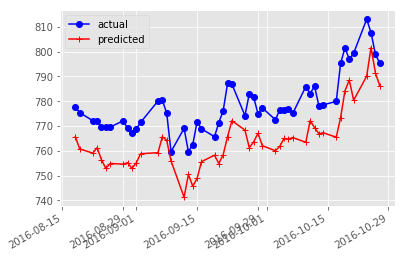

[786.2877551020408, 791.5296734693878, 801.6797551020408, 790.1161224489796, 780.3979591836735, 788.5455102040816, 784.1870612244899, 773.3792857142857, 765.4771428571428, 767.2931632653061, 766.8710612244898, 769.3644081632654, 772.2111428571428, 763.425530612245, 765.3397142857143, 764.6918367346939, 764.9961428571428, 761.7763877551021, 760.0290816326531, 762.0708775510204, 767.0870204081633, 763.5629591836735, 761.2561224489796, 768.3631428571429, 772.1424285714286, 765.6734693877551, 758.4682857142857, 754.8755102040816, 758.232693877551, 755.6117346938776, 748.8777346938775, 745.6579795918367, 750.4385306122449, 741.2602653061224, 755.955306122449, 764.2893673469388, 765.6734693877551, 759.2437755102042, 758.8118571428571, 755.1209183673469, 752.9220612244898, 755.1994489795919, 754.6202857142857, 754.8755102040816, 752.9122448979592, 756.4264897959184, 761.2364897959184, 759.0670816326531, 760.765306122449, 765.6832857142857]
Number of hidden states= 4  and time steps= 50


  0%|          | 0/50 [00:00<?, ?it/s]

50


100%|██████████| 50/50 [02:42<00:00,  3.32s/it]


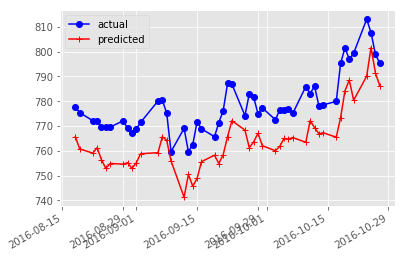

[786.2877551020408, 791.5296734693878, 801.6797551020408, 790.1161224489796, 780.3979591836735, 788.5455102040816, 784.1870612244899, 773.3792857142857, 765.4771428571428, 767.2931632653061, 766.8710612244898, 769.3644081632654, 772.2111428571428, 763.425530612245, 765.3397142857143, 764.6918367346939, 764.9961428571428, 761.7763877551021, 760.0290816326531, 762.0708775510204, 767.0870204081633, 763.5629591836735, 761.2561224489796, 768.3631428571429, 772.1424285714286, 765.6734693877551, 758.4682857142857, 754.8755102040816, 758.232693877551, 755.6117346938776, 748.8777346938775, 745.6579795918367, 750.4385306122449, 741.2602653061224, 755.955306122449, 764.2893673469388, 765.6734693877551, 759.2437755102042, 758.8118571428571, 755.1209183673469, 752.9220612244898, 755.1994489795919, 754.6202857142857, 754.8755102040816, 752.9122448979592, 756.4264897959184, 761.2364897959184, 759.0670816326531, 760.765306122449, 765.6832857142857]
Number of hidden states= 4  and time steps= 75


  0%|          | 0/50 [00:00<?, ?it/s]

75


100%|██████████| 50/50 [02:57<00:00,  3.52s/it]


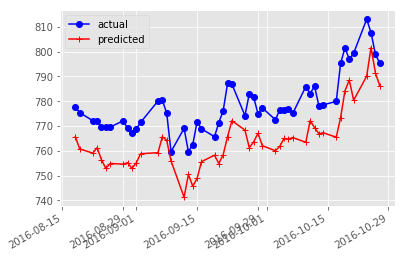

[786.2877551020408, 791.5296734693878, 801.6797551020408, 790.1161224489796, 780.3979591836735, 788.5455102040816, 784.1870612244899, 773.3792857142857, 765.4771428571428, 767.2931632653061, 766.8710612244898, 769.3644081632654, 772.2111428571428, 763.425530612245, 765.3397142857143, 764.6918367346939, 764.9961428571428, 761.7763877551021, 760.0290816326531, 762.0708775510204, 767.0870204081633, 763.5629591836735, 761.2561224489796, 768.3631428571429, 772.1424285714286, 765.6734693877551, 758.4682857142857, 754.8755102040816, 758.232693877551, 755.6117346938776, 748.8777346938775, 745.6579795918367, 750.4385306122449, 741.2602653061224, 755.955306122449, 764.2893673469388, 765.6734693877551, 759.2437755102042, 758.8118571428571, 755.1209183673469, 752.9220612244898, 755.1994489795919, 754.6202857142857, 754.8755102040816, 752.9122448979592, 756.4264897959184, 761.2364897959184, 759.0670816326531, 760.765306122449, 765.6832857142857]
Number of hidden states= 8  and time steps= 20


  0%|          | 0/50 [00:00<?, ?it/s]

20


100%|██████████| 50/50 [02:29<00:00,  2.07s/it]


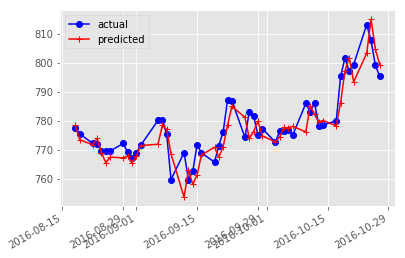

[799.3653061224489, 804.6944081632653, 815.0133061224489, 803.2573469387754, 793.3775510204082, 801.660612244898, 797.2296734693878, 786.2421428571429, 778.2085714285714, 780.0547959183673, 779.6256734693877, 782.1604897959184, 785.0545714285714, 776.1228367346939, 778.068857142857, 777.4102040816326, 777.7195714285714, 774.4462653061224, 772.6698979591837, 774.7456530612245, 779.845224489796, 776.2625510204082, 773.9173469387755, 781.1425714285714, 784.9847142857143, 778.4081632653061, 771.0831428571428, 767.4306122448979, 770.8436326530611, 768.179081632653, 761.333081632653, 758.0597755102041, 762.9198367346938, 753.5889183673469, 768.5283673469388, 777.0010408163265, 778.4081632653061, 771.8715306122449, 771.4324285714285, 767.6801020408163, 765.4446734693877, 767.7599387755102, 767.1711428571429, 767.4306122448979, 765.434693877551, 769.0073877551021, 773.897387755102, 771.6918979591836, 773.4183673469388, 778.4181428571428]
Number of hidden states= 8  and time steps= 50


  0%|          | 0/50 [00:00<?, ?it/s]

50


100%|██████████| 50/50 [01:50<00:00,  2.10s/it]


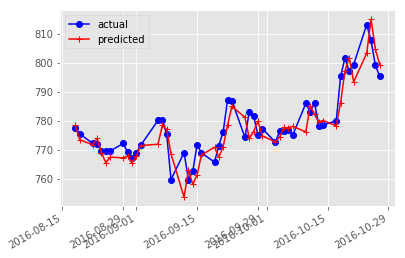

[799.3653061224489, 804.6944081632653, 815.0133061224489, 803.2573469387754, 793.3775510204082, 801.660612244898, 797.2296734693878, 786.2421428571429, 778.2085714285714, 780.0547959183673, 779.6256734693877, 782.1604897959184, 785.0545714285714, 776.1228367346939, 778.068857142857, 777.4102040816326, 777.7195714285714, 774.4462653061224, 772.6698979591837, 774.7456530612245, 779.845224489796, 776.2625510204082, 773.9173469387755, 781.1425714285714, 784.9847142857143, 778.4081632653061, 771.0831428571428, 767.4306122448979, 770.8436326530611, 768.179081632653, 761.333081632653, 758.0597755102041, 762.9198367346938, 753.5889183673469, 768.5283673469388, 777.0010408163265, 778.4081632653061, 771.8715306122449, 771.4324285714285, 767.6801020408163, 765.4446734693877, 767.7599387755102, 767.1711428571429, 767.4306122448979, 765.434693877551, 769.0073877551021, 773.897387755102, 771.6918979591836, 773.4183673469388, 778.4181428571428]
Number of hidden states= 8  and time steps= 75


  0%|          | 0/50 [00:00<?, ?it/s]

75


100%|██████████| 50/50 [01:48<00:00,  2.18s/it]


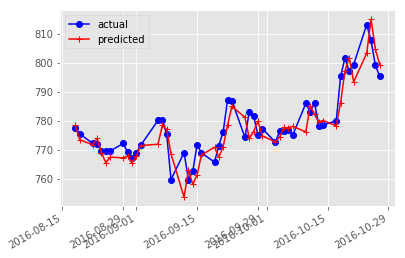

[799.3653061224489, 804.6944081632653, 815.0133061224489, 803.2573469387754, 793.3775510204082, 801.660612244898, 797.2296734693878, 786.2421428571429, 778.2085714285714, 780.0547959183673, 779.6256734693877, 782.1604897959184, 785.0545714285714, 776.1228367346939, 778.068857142857, 777.4102040816326, 777.7195714285714, 774.4462653061224, 772.6698979591837, 774.7456530612245, 779.845224489796, 776.2625510204082, 773.9173469387755, 781.1425714285714, 784.9847142857143, 778.4081632653061, 771.0831428571428, 767.4306122448979, 770.8436326530611, 768.179081632653, 761.333081632653, 758.0597755102041, 762.9198367346938, 753.5889183673469, 768.5283673469388, 777.0010408163265, 778.4081632653061, 771.8715306122449, 771.4324285714285, 767.6801020408163, 765.4446734693877, 767.7599387755102, 767.1711428571429, 767.4306122448979, 765.434693877551, 769.0073877551021, 773.897387755102, 771.6918979591836, 773.4183673469388, 778.4181428571428]
Number of hidden states= 12  and time steps= 20


  0%|          | 0/50 [00:00<?, ?it/s]

20


100%|██████████| 50/50 [01:45<00:00,  2.04s/it]


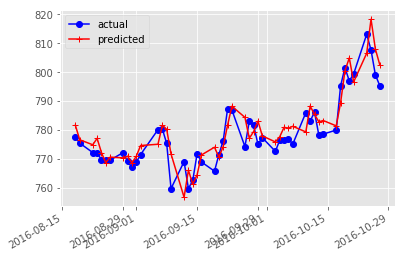

[802.6346938775511, 807.9855918367348, 818.346693877551, 806.5426530612245, 796.6224489795918, 804.939387755102, 800.4903265306123, 789.4578571428572, 781.3914285714285, 783.2452040816327, 782.8143265306123, 785.3595102040816, 788.2654285714285, 779.2971632653062, 781.2511428571429, 780.5897959183674, 780.9004285714285, 777.6137346938775, 775.8301020408163, 777.9143469387756, 783.0347755102041, 779.4374489795919, 777.0826530612245, 784.3374285714286, 788.1952857142858, 781.5918367346939, 774.2368571428572, 770.5693877551021, 773.9963673469388, 771.320918367347, 764.4469183673469, 761.160224489796, 766.0401632653062, 756.6710816326531, 771.6716326530612, 780.1789591836736, 781.5918367346939, 775.0284693877552, 774.5875714285714, 770.8198979591837, 768.5753265306123, 770.9000612244898, 770.3088571428572, 770.5693877551021, 768.565306122449, 772.152612244898, 777.062612244898, 774.8481020408163, 776.5816326530612, 781.6018571428572]
Number of hidden states= 12  and time steps= 50


  0%|          | 0/50 [00:00<?, ?it/s]

50


100%|██████████| 50/50 [02:27<00:00,  2.99s/it]


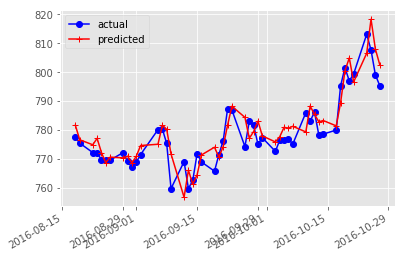

[802.6346938775511, 807.9855918367348, 818.346693877551, 806.5426530612245, 796.6224489795918, 804.939387755102, 800.4903265306123, 789.4578571428572, 781.3914285714285, 783.2452040816327, 782.8143265306123, 785.3595102040816, 788.2654285714285, 779.2971632653062, 781.2511428571429, 780.5897959183674, 780.9004285714285, 777.6137346938775, 775.8301020408163, 777.9143469387756, 783.0347755102041, 779.4374489795919, 777.0826530612245, 784.3374285714286, 788.1952857142858, 781.5918367346939, 774.2368571428572, 770.5693877551021, 773.9963673469388, 771.320918367347, 764.4469183673469, 761.160224489796, 766.0401632653062, 756.6710816326531, 771.6716326530612, 780.1789591836736, 781.5918367346939, 775.0284693877552, 774.5875714285714, 770.8198979591837, 768.5753265306123, 770.9000612244898, 770.3088571428572, 770.5693877551021, 768.565306122449, 772.152612244898, 777.062612244898, 774.8481020408163, 776.5816326530612, 781.6018571428572]
Number of hidden states= 12  and time steps= 75


  0%|          | 0/50 [00:00<?, ?it/s]

75


 94%|█████████▍| 47/50 [02:21<00:09,  3.22s/it]

In [ ]:
hidden_states=[4,8,12]
time_steps=[20,50,75]
for i in hidden_states:
    for j in time_steps:
        print("Number of hidden states=",i," and time steps=",j)
        predict(i,j)